In [ ]:
import numpy as np 
import pandas as pd 

import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 106 kB 5.3 MB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco Customer churn.csv to Telco Customer churn.csv


In [ ]:
data = pd.read_csv('Telco Customer churn.csv')

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
del data["customerID"]

In [ ]:
gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

data["gender"] = data["gender"].map(gender_map)

def binary_encode(features):
    for feature in features:
        data[feature] = data[feature].map(yes_no_map)

In [ ]:
binary_encode_candidate = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
binary_encode(binary_encode_candidate)

In [ ]:
# converting series object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

In [ ]:
print(data.isnull().any())
print("\n# of Null values in 'TotalCharges`: ",data["TotalCharges"].isnull().sum())

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

# of Null values in 'TotalCharges`:  11


In [ ]:
data["TotalCharges"].fillna(data["TotalCharges"].mean(), inplace=True)

In [ ]:
dataset = pd.get_dummies(data)

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


In [ ]:
Correlation = dataset.corr()

In [ ]:
print(Correlation['Churn'])

gender                                    -0.008612
SeniorCitizen                              0.150889
Partner                                   -0.150448
Dependents                                -0.164221
tenure                                    -0.352229
PhoneService                               0.011942
PaperlessBilling                           0.191825
MonthlyCharges                             0.193356
TotalCharges                              -0.199428
Churn                                      1.000000
MultipleLines_No                          -0.032569
MultipleLines_No phone service            -0.011942
MultipleLines_Yes                          0.040102
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetService_No                        -0.227890
OnlineSecurity_No                          0.342637
OnlineSecurity_No internet service        -0.227890
OnlineSecurity_Yes                        -0.171226
OnlineBackup

Yang punya korelasi postif dengan Churn , 
SeniorCitizen                              0.150889, 
PhoneService                               0.011942
PaperlessBilling                           0.191825
MonthlyCharges                             0.193356
MultipleLines_Yes                          0.040102
InternetService_Fiber optic                0.308020
OnlineSecurity_No                          0.342637
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
TechSupport_No                             0.337281
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_No                         0.130845
StreamingMovies_Yes                        0.061382
Contract_Month-to-month                    0.405103

yang paling tinggi adalah = Contract_Month-to-month, TechSupport_No, OnlineSecurity_No, InternetService_Fiber optic,  PaymentMethod_Electronic check                     

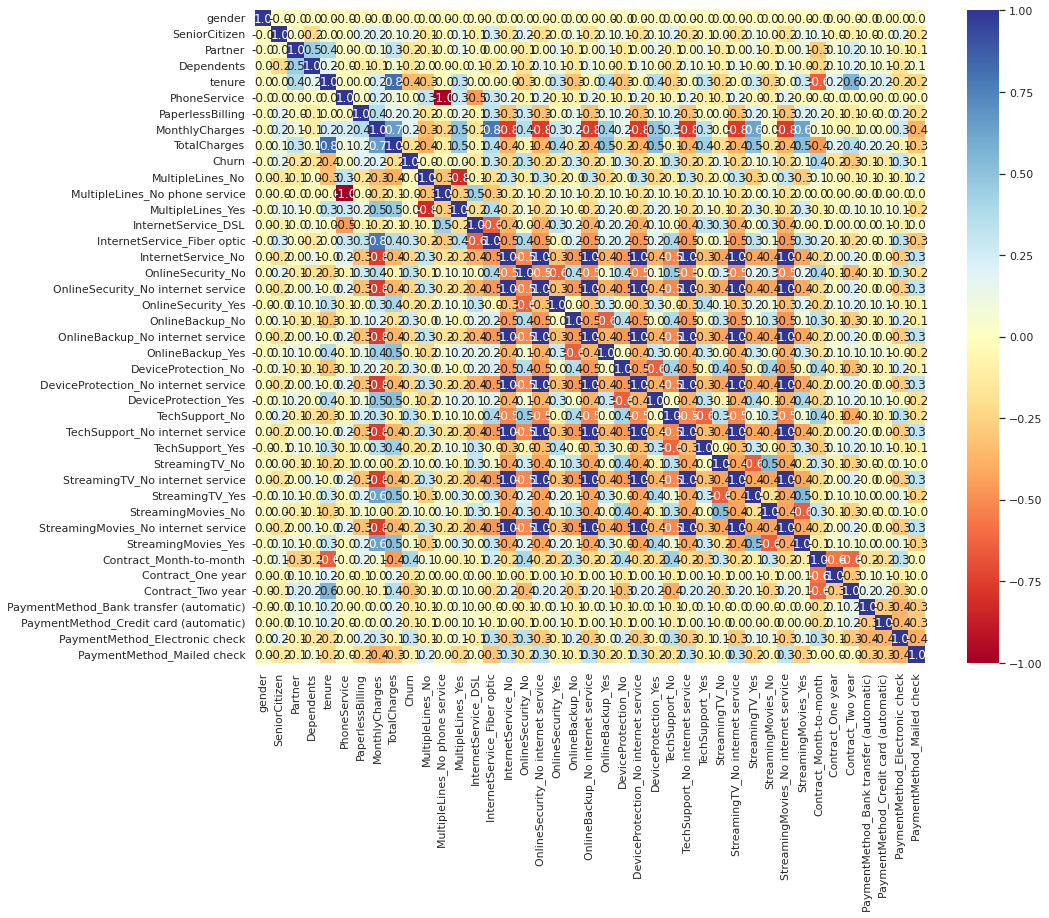

In [ ]:
plt.figure(figsize = (15, 12))
sns.heatmap(dataset.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

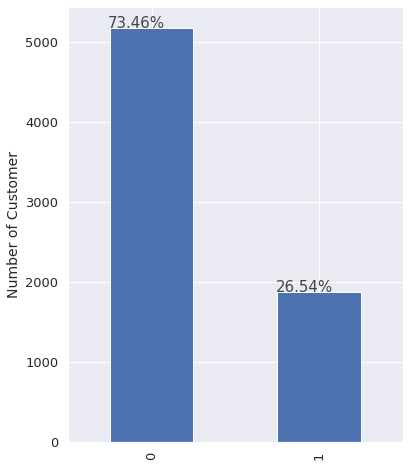

In [ ]:
ax = new_df["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

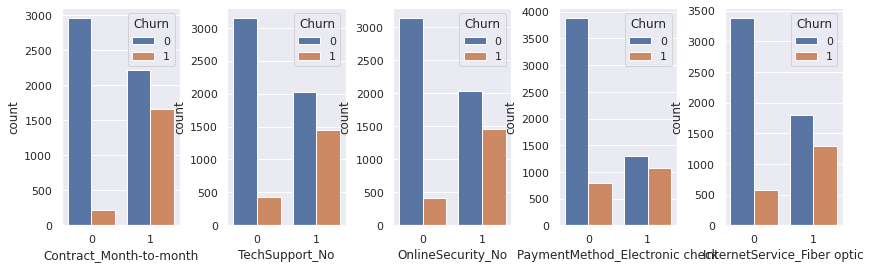

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(14, 4))
plt.subplots_adjust(wspace=0.4)
sns.countplot(x = "Contract_Month-to-month", hue="Churn" , ax=ax[0], data=dataset)
sns.countplot(data = dataset, x = "TechSupport_No", ax=ax[1], hue="Churn")
sns.countplot(data = dataset, x = "OnlineSecurity_No", ax=ax[2], hue="Churn")
sns.countplot(data = dataset, x = "PaymentMethod_Electronic check", ax=ax[3], hue="Churn")
sns.countplot(data = dataset, x = "InternetService_Fiber optic", ax=ax[4], hue="Churn")
fig.show()